# Exploring Variations in COVID-19 Case Fatality Rates Across Countries
##### Written by Tzu Yi, Huang (Department of Medicine, National Taiwan University, Taipei, Taiwan)
##### Correspond to b08401055@ntu.edu.tw
+ The case fatality rate (CFR) is an important prognosis indicator of an emerging disease, defined as total deaths/total cases.
+ CFR is often reported in the media for cross-country comparisons.
+ However, CFR varies spatiotemporally and the variations are not easily explained.
+ Here I collect data to annalyze what may correalte with COVID-19 case fatality rates.

### Collect and format data
+ import all the modules we need
+ write a function to map various indicators to each country
|data|source|
|----|:----|
|CFR |Our World in Data (https://ourworldindata.org/)|
|demography|Our World in Data (https://ourworldindata.org/)|
|HAQ|Our World in Data (https://ourworldindata.org/)|
|GDP|Our World in Data (https://ourworldindata.org/)|
|All DALYs rate|Global Burden of Disease Study 2019 (GBD 2019) Results http://ghdx.healthdata.org/gbd-results-tool.|


In [86]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
CFR = pd.read_excel('CFR and HAQ.xlsx', sheet_name='CFR')

def formatData(cname, sname, value = 'val'):
    df = pd.read_excel('CFR and HAQ.xlsx', sheet_name=sname)
    pattern = re.compile("\s\(.*\)")
    df['country'] = df["country"].str.replace(pattern, '#').astype(str).str.strip('#')
    dataMap = dict(df[['country', value]].values)
    CFR[cname] = CFR['country'].map(dataMap)
    
#basic country information 
formatData(sname='demography', cname='continent', value = 'continent')
formatData(sname='demography', cname='population', value = 'population')
formatData(sname='demography', cname='population density', value = 'population_density')
#demography and population structure
formatData(sname='demography', cname='median age', value = 'median_age')
formatData(sname='demography', cname='aged 70 older', value = 'aged_70_older')
#healthcare system and medical development
formatData(sname='demography', cname='life expectancy', value = 'life_expectancy')
formatData(sname='HAQ', cname='HAQ')
#disease burden of non-communicable disease
formatData(sname='COPD DALYs', cname='DALYs rate from COPD')
formatData(sname='CVD DALYs', cname='DALYs rate from CVD')
formatData(sname='diabetes DALYs', cname='DALYs rate from DM')
#disease burden from S. pneumoniae
formatData(sname='Pneumo DALYs', cname='DALYs rate from PNEU')
#disease bruden due to environmental exposure
formatData(sname='air pollution DALYs', cname='DALYs rate from air pollution')
formatData(sname='tobacco DALYs', cname='DALYs rate from tobacco use')
formatData(sname='low physical DALYs', cname='DALYs rate from low physical activity')
#economy
formatData(sname='2018 GDP', cname='2018 GDP')
CFR.head()

,country,2020/4/16 CFR,2020/6/16 CFR,2020/8/16 CFR,2020/10/16 CFR,2020/12/16 CFR,2021/2/16 CFR,2021/4/16 CFR,2021/6/16 CFR,continent,...,life expectancy,HAQ,DALYs rate from COPD,DALYs rate from CVD,DALYs rate from DM,DALYs rate from PNEU,DALYs rate from air pollution,DALYs rate from tobacco use,DALYs rate from low physical activity,2018 GDP
0,Afghanistan,0.0357,0.0189,0.0366,0.0371,0.0409,0.0437,0.0440,0.0395,Asia,...,64.83,32.5,360.230585,4753.720830,660.642999,2149.513595,4830.953644,1635.230931,286.182376,6.759497e+10
1,Albania,0.0502,0.0221,0.0309,0.0269,0.0205,0.0167,0.0181,0.0185,Europe,...,78.57,78.2,462.964421,8133.500336,584.944651,249.198467,1771.284791,4267.505676,179.028940,3.400911e+10
2,Algeria,0.1534,0.0709,0.0355,0.0341,0.0281,0.0265,0.0264,0.0268,Africa,...,76.88,63.7,354.269981,4907.464502,839.783813,250.260303,1564.623621,1897.730633,469.859695,5.903175e+11
3,Andorra,0.0490,0.0609,0.0536,0.0175,0.0106,0.0101,0.0097,0.0092,Europe,...,83.73,94.6,862.147312,3145.011737,722.868903,135.605843,341.496534,3540.787845,260.386176,NaN
4,Angola,0.1053,0.0452,0.0462,0.0324,0.0231,0.0242,0.0232,0.0228,Africa,...,61.15,40.7,273.843761,2458.389560,602.691642,1553.607498,2388.742040,1086.826872,71.514568,1.759296e+11


### Clean data
+ find information -> how many non-null values do we have?
+ drop exception values

In [91]:
CFR.drop(CFR[CFR['2021/6/16 CFR']=='Jun 17, 2021\xa00.36%'].index, inplace=True)
CFR['2021/6/16 CFR'] = CFR['2021/6/16 CFR'].astype(float)
CFR.to_csv('CFR correlation data.csv')
#CFR.to_excel('CFR correlation data.xlsx')

In [92]:
CFR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 185
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                185 non-null    object 
 1   2020/4/16 CFR                          153 non-null    float64
 2   2020/6/16 CFR                          168 non-null    float64
 3   2020/8/16 CFR                          174 non-null    float64
 4   2020/10/16 CFR                         174 non-null    float64
 5   2020/12/16 CFR                         175 non-null    float64
 6   2021/2/16 CFR                          181 non-null    float64
 7   2021/4/16 CFR                          183 non-null    float64
 8   2021/6/16 CFR                          185 non-null    float64
 9   continent                              184 non-null    object 
 10  population                             185 non-null    float64
 11  popula

### Data distribution
+ create a histogram for each indocator
+ We can see that the distribution patterns of CFR and most indicators are skewed to the right, rather than normal distribution.
+ Thus, it's more appropriate to use the nonparametric spearman correlation to analyze the monotonic relationship between CFR and these indicators.

array([[<AxesSubplot:title={'center':'2020/4/16 CFR'}>,
        <AxesSubplot:title={'center':'2020/6/16 CFR'}>,
        <AxesSubplot:title={'center':'2020/8/16 CFR'}>,
        <AxesSubplot:title={'center':'2020/10/16 CFR'}>,
        <AxesSubplot:title={'center':'2020/12/16 CFR'}>],
       [<AxesSubplot:title={'center':'2021/2/16 CFR'}>,
        <AxesSubplot:title={'center':'2021/4/16 CFR'}>,
        <AxesSubplot:title={'center':'2021/6/16 CFR'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'population density'}>],
       [<AxesSubplot:title={'center':'median age'}>,
        <AxesSubplot:title={'center':'aged 70 older'}>,
        <AxesSubplot:title={'center':'life expectancy'}>,
        <AxesSubplot:title={'center':'HAQ'}>,
        <AxesSubplot:title={'center':'DALYs rate from COPD'}>],
       [<AxesSubplot:title={'center':'DALYs rate from CVD'}>,
        <AxesSubplot:title={'center':'DALYs rate from DM'}>,
        <AxesSubplot:title={'cente

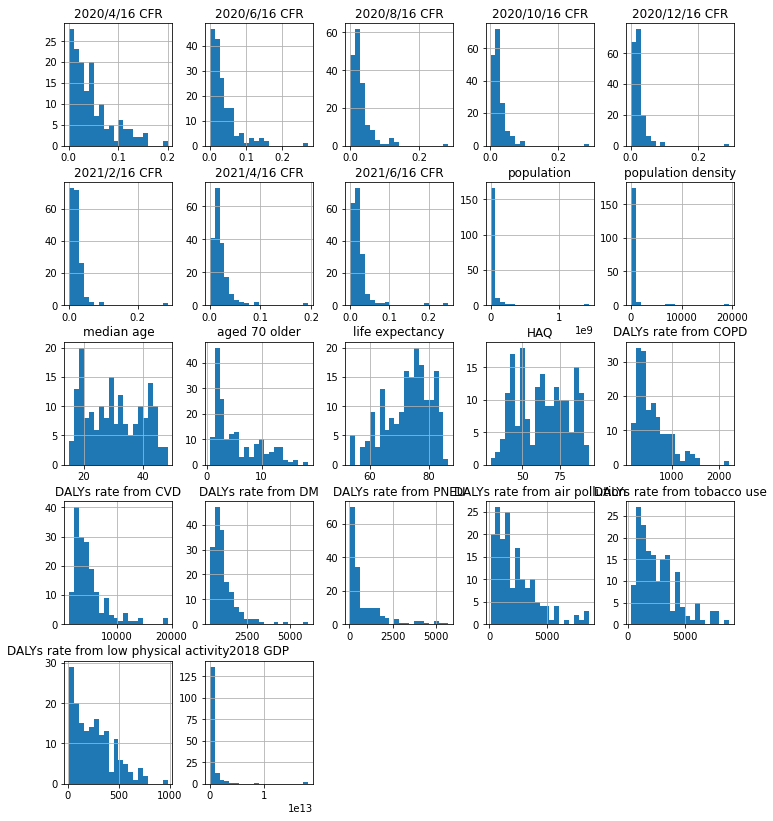

In [93]:
CFR.hist(bins=20, figsize=(12, 14))

In [123]:
CFR1 = CFR.dropna()
cor = CFR1.corr(method='spearman')
spear = cor.iloc[:8, 8:].drop(['population density', 'DALYs rate from air pollution', 'DALYs rate from PNEU'], axis=1).T
spear

,2020/4/16 CFR,2020/6/16 CFR,2020/8/16 CFR,2020/10/16 CFR,2020/12/16 CFR,2021/2/16 CFR,2021/4/16 CFR,2021/6/16 CFR
population,0.302995,0.226244,0.260014,0.376298,0.349796,0.329619,0.298942,0.283197
median age,-0.134742,0.337685,0.184022,-0.040891,-0.103809,-0.046204,-0.060708,-0.067524
aged 70 older,0.010735,0.442550,0.307070,0.105467,0.028312,0.082866,0.064896,0.057927
life expectancy,-0.159657,0.257704,0.137212,-0.019484,-0.116391,-0.116716,-0.137703,-0.164975
HAQ,-0.200821,0.227671,0.109050,-0.082667,-0.171294,-0.134063,-0.157783,-0.185653
DALYs rate from COPD,0.069978,0.323259,0.230930,0.121550,0.029016,0.089971,0.063117,0.056905
DALYs rate from CVD,-0.030944,0.189022,0.092609,-0.052685,-0.030106,0.053544,0.059232,0.079761
DALYs rate from DM,-0.021291,0.056195,-0.058996,-0.064900,0.018853,0.059292,0.073541,0.093214
DALYs rate from tobacco use,-0.083903,0.262687,0.138226,-0.053803,-0.096202,0.004137,0.004578,0.014658
DALYs rate from low physical activity,-0.096155,0.189774,0.066000,-0.052630,-0.070444,-0.029806,-0.034816,-0.036664


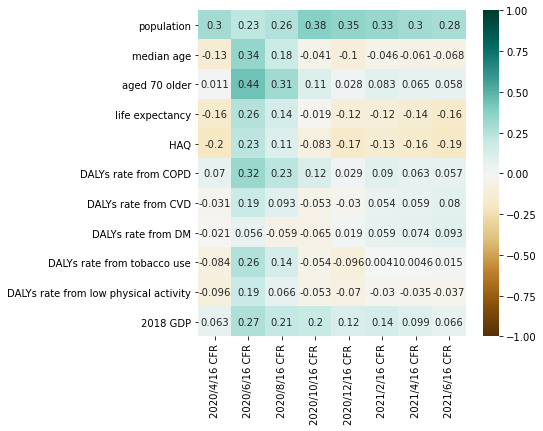

In [125]:
fig, ax = plt.subplots(figsize=(6, 6))         # Sample figsize in inches

ax = sns.heatmap(spear, cmap='BrBG', vmin=-1.0, vmax=1.0, annot=True)

In [126]:
CFR1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 185
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                128 non-null    object 
 1   2020/4/16 CFR                          128 non-null    float64
 2   2020/6/16 CFR                          128 non-null    float64
 3   2020/8/16 CFR                          128 non-null    float64
 4   2020/10/16 CFR                         128 non-null    float64
 5   2020/12/16 CFR                         128 non-null    float64
 6   2021/2/16 CFR                          128 non-null    float64
 7   2021/4/16 CFR                          128 non-null    float64
 8   2021/6/16 CFR                          128 non-null    float64
 9   continent                              128 non-null    object 
 10  population                             128 non-null    float64
 11  popula

### Hypothesis test
+ null hypothesis: rho (spearman correlation coefficient) = 0 (there's no monotonic relationship between the two)
+ two-tailed student's t test (alpha = 0.05)
+ test statistics = abs(rho*np.sqrt((n-2)/(1-rho**2)))
+ calculate p-value and only ahow those <0.05

In [127]:
test_stat = abs(spear*np.sqrt((128-2)/(1-spear**2)))
test_stat

,2020/4/16 CFR,2020/6/16 CFR,2020/8/16 CFR,2020/10/16 CFR,2020/12/16 CFR,2021/2/16 CFR,2021/4/16 CFR,2021/6/16 CFR
population,3.568876,2.607179,3.022617,4.559034,4.191229,3.918979,3.516423,3.314573
median age,1.526393,4.027051,2.101536,0.459387,1.171588,0.519191,0.682709,0.759686
aged 70 older,0.120512,5.539618,3.621834,1.190506,0.317933,0.933384,0.729993,0.651319
life expectancy,1.815438,2.993840,1.554913,0.218751,1.315428,1.319146,1.560584,1.877566
HAQ,2.301084,2.624531,1.231427,0.931126,1.951620,1.518556,1.793577,2.120815
DALYs rate from COPD,0.787427,3.834448,2.664194,1.374588,0.325843,1.014031,0.709906,0.639793
DALYs rate from CVD,0.347517,2.160715,1.044025,0.592207,0.338096,0.601888,0.666043,0.898174
DALYs rate from DM,0.239040,0.631782,0.663381,0.730035,0.211661,0.666722,0.827737,1.050906
DALYs rate from tobacco use,0.945145,3.055978,1.566622,0.604819,1.084893,0.046443,0.051389,0.164557
DALYs rate from low physical activity,1.084364,2.169638,0.742467,0.591594,0.792707,0.334722,0.391048,0.411833


In [128]:
spear.shape

(11, 8)

In [129]:
from scipy.stats import t
df = test_stat.copy()
df2 = df.copy()
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        df.iloc[i, j]= t.sf(df.iloc[i, j], 126)*2
        if df.iloc[i, j] <= 0.05:
            df2.iloc[i, j] = df.iloc[i, j]
        else:
            df2.iloc[i, j] = np.nan
df

,2020/4/16 CFR,2020/6/16 CFR,2020/8/16 CFR,2020/10/16 CFR,2020/12/16 CFR,2021/2/16 CFR,2021/4/16 CFR,2021/6/16 CFR
population,0.000508,1.023076e-02,0.003036,0.000012,0.000052,0.000145,0.000609,0.001199
median age,0.129418,9.693869e-05,0.037586,0.646748,0.243573,0.604539,0.496044,0.448861
aged 70 older,0.904269,1.691069e-07,0.000423,0.236086,0.751062,0.352407,0.466749,0.516027
life expectancy,0.071835,3.316634e-03,0.122475,0.827198,0.190755,0.189512,0.121130,0.062753
HAQ,0.023029,9.749890e-03,0.220457,0.353569,0.053202,0.131379,0.075279,0.035897
DALYs rate from COPD,0.432511,1.977897e-04,0.008726,0.171699,0.745084,0.312511,0.479074,0.523469
DALYs rate from CVD,0.728783,3.260932e-02,0.298473,0.554773,0.735854,0.548330,0.506601,0.370806
DALYs rate from DM,0.811463,5.286742e-01,0.508299,0.466724,0.832713,0.506168,0.409384,0.295313
DALYs rate from tobacco use,0.346394,2.739026e-03,0.119711,0.546387,0.280041,0.963031,0.959097,0.869557
DALYs rate from low physical activity,0.280274,3.191087e-02,0.459186,0.555182,0.429439,0.738391,0.696422,0.681162


In [130]:
df2

,2020/4/16 CFR,2020/6/16 CFR,2020/8/16 CFR,2020/10/16 CFR,2020/12/16 CFR,2021/2/16 CFR,2021/4/16 CFR,2021/6/16 CFR
population,0.000508,1.023076e-02,0.003036,0.000012,0.000052,0.000145,0.000609,0.001199
median age,NaN,9.693869e-05,0.037586,NaN,NaN,NaN,NaN,NaN
aged 70 older,NaN,1.691069e-07,0.000423,NaN,NaN,NaN,NaN,NaN
life expectancy,NaN,3.316634e-03,NaN,NaN,NaN,NaN,NaN,NaN
HAQ,0.023029,9.749890e-03,NaN,NaN,NaN,NaN,NaN,0.035897
DALYs rate from COPD,NaN,1.977897e-04,0.008726,NaN,NaN,NaN,NaN,NaN
DALYs rate from CVD,NaN,3.260932e-02,NaN,NaN,NaN,NaN,NaN,NaN
DALYs rate from DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DALYs rate from tobacco use,NaN,2.739026e-03,NaN,NaN,NaN,NaN,NaN,NaN
DALYs rate from low physical activity,NaN,3.191087e-02,NaN,NaN,NaN,NaN,NaN,NaN
